 # Pandas虎の巻

 ## シリーズの基本操作

 ### シリーズの作成

In [280]:
import pandas as pd
pythonScore = pd.Series([90,70,70,80], index=['工藤','浅木','松田','瀬川'])

pythonScore # シリーズの表示

工藤    90
浅木    70
松田    70
瀬川    80
dtype: int64

 ### インデックスの参照

In [281]:
pythonScore.index

Index(['工藤', '浅木', '松田', '瀬川'], dtype='object')

 ### インデックスによるデータ参照

In [282]:
pythonScore['工藤'] # インデックスが'工藤'のデータを取得

90

 ### 重複の排除結果を参照

In [283]:
pythonScore.unique()

array([90, 70, 80], dtype=int64)

 ### データの個数を集計

In [284]:
pythonScore.value_counts()

70    2
80    1
90    1
dtype: int64

 ### データを並べ替える

In [285]:
pythonScore.sort_values(ascending=False)

工藤    90
瀬川    80
浅木    70
松田    70
dtype: int64

 ### 各要素に関数を適用する

In [286]:
def fixedscore(score):
    return 0.8*score + 20 # 試験の素点を0.8倍し、20点足す

pythonScore.map(fixedscore)

工藤    92.0
浅木    76.0
松田    76.0
瀬川    84.0
dtype: float64

 ### 各要素との演算

In [287]:
pythonScore >= 80 # 80点以上が合格

工藤     True
浅木    False
松田    False
瀬川     True
dtype: bool

In [288]:
pythonScore + 5 # 全員に5点おまけ

工藤    95
浅木    75
松田    75
瀬川    85
dtype: int64

 ### 条件式による検索

In [289]:
pythonScore[pythonScore >= 80]

工藤    90
瀬川    80
dtype: int64

 ## データフレームの基本操作

 ### データフレームの作成

In [290]:
import pandas as pd
score = {'工藤':[90,70], '浅木':[70,80], '松田':[70,80], '瀬川':[85,70]}

df = pd.DataFrame(score, index=['Python','ML'])
df

,工藤,浅木,松田,瀬川
Python,90,70,70,85
ML,70,80,80,70


 ### カラム名（列名）一覧の取得

In [291]:
df.columns

Index(['工藤', '浅木', '松田', '瀬川'], dtype='object')

 ### インデックスの取得

In [292]:
df.index

Index(['Python', 'ML'], dtype='object')

 ### 行数と列数の取得

In [293]:
df.shape

(2, 4)

 ### 先頭行数だけ取得する

In [294]:
df.head(1) # 先頭1行だけ

,工藤,浅木,松田,瀬川
Python,90,70,70,85


 ### 末尾行数だけ表示

In [295]:
df.tail(1)

,工藤,浅木,松田,瀬川
ML,70,80,80,70


 ### 特定列の取得

In [296]:
df['浅木']

Python    70
ML        80
Name: 浅木, dtype: int64

In [297]:
df[['浅木','松田']]

,浅木,松田
Python,70,70
ML,80,80


 ### インデックスによる特定行の抽出

In [298]:
df.loc['ML']

工藤    70
浅木    80
松田    80
瀬川    70
Name: ML, dtype: int64

 ### 検索条件による特定行の抽出

In [299]:
df[df['工藤'] < 80] # 工藤列が80未満のデータ

,工藤,浅木,松田,瀬川
ML,70,80,80,70


In [300]:
df[(df['工藤'] < 80) & (df['浅木'] < 70)]

,工藤,浅木,松田,瀬川


 ### 行と列を同時に指定して抽出

In [301]:
df.loc[['Python'],['工藤','浅木']]

,工藤,浅木
Python,90,70


In [302]:
df.loc[:,'工藤':'松田']
df

,工藤,浅木,松田,瀬川
Python,90,70,70,85
ML,70,80,80,70


 ### 行と列の追加および更新

In [303]:
df['福田'] = [75, 75]
df.loc['web_app'] = [65,70,65,85,90]
df

,工藤,浅木,松田,瀬川,福田
Python,90,70,70,85,75
ML,70,80,80,70,75
web_app,65,70,65,85,90


 ### 行と列の削除

In [304]:
df = df.drop('web_app', axis=0)
df = df.drop('福田', axis=1)
df

,工藤,浅木,松田,瀬川
Python,90,70,70,85
ML,70,80,80,70


In [305]:
df['福田'] = [75, 75]

 ### CSVファイルの読み込み
 pd.read_csv('ファイル名', encoding='文字コード', sep='区切り文字')

 ### CSVファイルとして保存
 df.to_csv('ファイル名', index=ブール値)

 ## データフレームの応用操作

 ### 代表値の計算

In [306]:
df.sum() # 列ごとの合計値の計算

工藤    160
浅木    150
松田    150
瀬川    155
福田    150
dtype: int64

In [307]:
df.mean(axis=1) # 行ごとの平均値

Python    78.0
ML        75.0
dtype: float64

 ### 一括集計

In [308]:
df.describe()

,工藤,浅木,松田,瀬川,福田
count,2.000000,2.000000,2.000000,2.000000,2.0
mean,80.000000,75.000000,75.000000,77.500000,75.0
std,14.142136,7.071068,7.071068,10.606602,0.0
min,70.000000,70.000000,70.000000,70.000000,75.0
25%,75.000000,72.500000,72.500000,73.750000,75.0
50%,80.000000,75.000000,75.000000,77.500000,75.0
75%,85.000000,77.500000,77.500000,81.250000,75.0
max,90.000000,80.000000,80.000000,85.000000,75.0


 ### グループ集計

In [309]:
data = pd.DataFrame({
    '年齢':[22, 25, 30, 40, 40],
    '性別':[1,0,1,1,1],
    '役職':[0,0,0,1,1]
}, index=['松田','浅木','工藤','瀬川','福田'])

data.groupby('役職').mean() # 役職ごとの集計

,年齢,性別
役職,,
0,25.666667,0.666667
1,40.000000,1.000000


 ### ピボットテーブル集計

In [310]:
pd.pivot_table(data, index='性別', columns='役職', values='年齢', aggfunc=max, margins=True)

役職,0,1,All
性別,,,
0,25.0,NaN,25
1,30.0,40.0,40
All,30.0,40.0,40


 ### ２つのデータフレームの結合
 - 行方向の単純な結合

 >> pd.concat([df1, df2], axis=0)
 - 列方向の単純な結合

 >> pd.concat([df1, df2], axis=1)
 - 内部結合
 >> df.merge(df2, on='キー列名', how='inner')
 - データフレームの列名が異なるときの内部結合
 left_on='dfの列名', right_on='df2の列名'
 - 左外部結合
 >> df.merge(df2, on='キー列名', how='left')
 - 右外部結合
 >> df.merge(df2, on='キー列名', how='right')

 ### データフレームの欠損値の確認

In [311]:
import numpy as np
score2 = {
    '工藤':[90,70],
    '浅木':[70,80],
    '松田':[70,80],
    '瀬川':[85,np.nan],
}
df2 = pd.DataFrame(score2, index=['Python','ML'])

df2.isnull() # 欠損値の確認

,工藤,浅木,松田,瀬川
Python,False,False,False,False
ML,False,False,False,True


 ### 欠損値のある行や列の削除

In [312]:
df2.dropna(axis=0) # 欠損値のある行を削除

,工藤,浅木,松田,瀬川
Python,90,70,70,85.0


 ### 欠損値のあるマスを他の値で穴埋め

In [313]:
df2.fillna(0)

,工藤,浅木,松田,瀬川
Python,90,70,70,85.0
ML,70,80,80,0.0


 ### 線形補完
 データフレーム.interpolate(limit_direction='ooo')

 ### ダミー変数化
 pd.get_dummies(データフレーム, drop_first=True)

 ## データの可視化

<Axes: title={'center': 'sales'}>

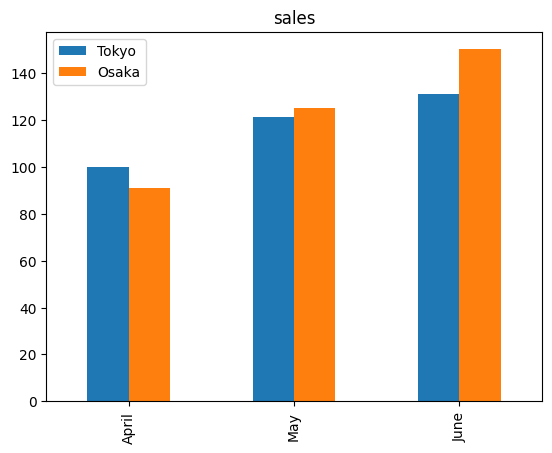

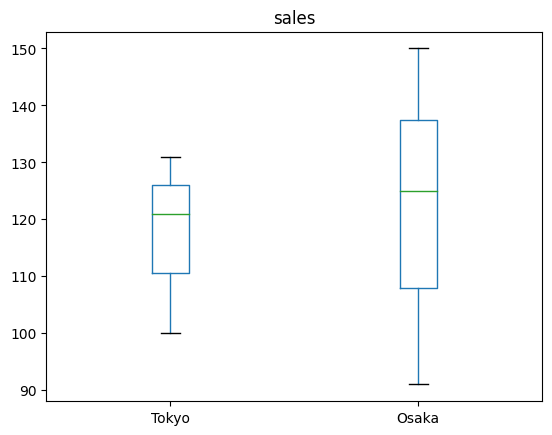

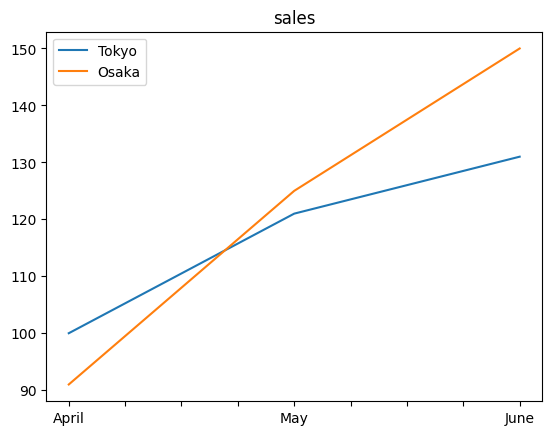

In [314]:
data = {
    'Tokyo':[100,121,131],
    'Osaka':[91,125,150],
}
# データフレームの作成
df3 = pd.DataFrame(data, index=['April','May','June'])

# 棒グラフの作成
df3.plot(kind='bar', title='sales')
# 箱ひげ図
df3.plot(kind='box', title='sales')
# 折れ線グラフ
df3.plot(kind='line', title='sales')